# EDA and cleaning

This is notebook 2 (out of 5) for <b>Project 3</b> of the GA Data Science Immersive<br>
Notebook by: <b>Martijn de Vries</b><br>
martijndevries91@gmail.com

## Problem Statement

A US political consultancy company is researching how news sources and discussed topics differ between the US political mainstream and the conservative right-wing media. In the last decade or so, the US political right-wing has been increasingly described as living in an entirely separate information ecosystem from the political mainstream. In order to gauge how intense this effect is, we will collect, process, and classify the Reddit content of two politically-themed subreddit that reflect the mainstream and conservative voters respectively: <b>r/politics</b> and <b>r/conservative</b>. 

For this project, we will build two separate branches of models: one for post submissions (largely consisting of links to news sites), and another for comments (consisting of actual Reddit users discussing political news). As this is a binary classification problem where the two classes are of equal interest and will be approximately balanced, we will use the accuracy score as the main metric to gauge the success of the classification model. 

Because political news is always evolving, we have chosen a specific moment in time: the month leading up to the 2022 midterms, October 6th to November 6th 2022. This ensures that 1) the same news cycle is covered for both subreddits, 2) both subreddits were at peak activity, and 3) maximum potential for interesting insights in the way that news is discussed within these two subreddits.

## This Notebook

Is divided into two sections: the first section is for posts, the second section is for comments. For each of the two, I will 
1) Do some cleaning (deleting duplicates, deleting identifying information, deleting non-english posts)
2) do some EDA related to eg. word frequency
3) engineer additional features that might help the classification model
4) save the results to two cleaned files in the data directory: all_submissions_cleaned.csv and all_comments_cleaned.csv.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

"""
Note: on my machine I needed to do 
$ pip install emoji==1.7 
to get the emoji package to work. See also:
https://stackoverflow.com/questions/73108683/getting-error-cannot-import-name-unicode-emoji-from-emoji-unicode-codes
"""
from emoji import UNICODE_EMOJI

#sklearn
from sklearn.feature_extraction.text import CountVectorizer

## 1) EDA and cleaning: posts

Let's get a more in-depth look at what submissions look like

In [2]:
post_df = pd.read_csv('../data/all_submissions.csv')
post_df.set_index('id', inplace=True)
post_df.head()

,created_utc,title,selftext,url,num_comments,upvote_ratio,subreddit
id,,,,,,,
xylvpq,1665212044,"Editorial: Hey, QAnon — Texas had an actual ch...",NaN,https://www.houstonchronicle.com/opinion/edito...,688,0.97,politics
xylh3y,1665210574,Sanders: Biden’s Marijuana Pardons Are Good — ...,NaN,https://truthout.org/articles/sanders-bidens-m...,269,0.97,politics
xyla6d,1665209886,Elon Musk suggests making Taiwan a ‘special ad...,[removed],NaN,24,0.26,politics
xykwzh,1665208590,Anyone else in Chicago noticing how Fox News k...,[removed],NaN,1,1.00,politics
xykox1,1665207791,Urfi wore a bold saree! Spread the flames of h...,NaN,https://countryconnect.in/entertainment-news/u...,1,1.00,politics


### 1.1) Cleaning

As I noted in the data collection notebook, the vast majority of posts seem to have either removed or empty self text. That does make sense, because these subreddits often posts links to media. It also appears that a lot of posts with text had their text removed.

So let's focus on the titles for now. First of all we want to make sure there is no identifying information in the titles. Do the subreddit names show up in them?


In [3]:
post_df[post_df['title'].str.contains('r/politics', na = False)] 

,created_utc,title,selftext,url,num_comments,upvote_ratio,subreddit
id,,,,,,,
yjcho3,1667318414,Welcome to the /r/politics 2022 US Midterm Ele...,##ENTRIES ARE CLOSED! THANK YOU TO ALL WHO PAR...,https://www.reddit.com/r/politics/comments/yjc...,0,0.88,politics
y8azy8,1666205742,"First time in /r/politics, amused by blind dow...",[removed],https://www.reddit.com/r/politics/comments/y82...,0,1.00,conservative
yc1s0s,1666584851,r/politics,[removed],https://www.reddit.com/r/Conservative/comments...,0,0.99,conservative
ydcpul,1666724383,How is /r/politics not a banned subreddit?,[removed],NaN,0,1.00,conservative
ye5hkk,1666809635,Black Lives Matter activists accuse executive ...,[removed],NaN,0,1.00,conservative
yh16qq,1667093382,How dumb can they get? This dumb. r/politics i...,NaN,https://i.redd.it/6o48ikn0juw91.jpg,0,1.00,conservative
yj1hdu,1667285934,r/politics is in complete denial that Paul Pel...,NaN,https://i.redd.it/zvd8zrnkfax91.jpg,0,0.50,conservative
yji4u5,1667330020,Reactions of some r/politics users on the whol...,[removed],NaN,0,1.00,conservative
yjhwdh,1667329538,Reactions of some r/politics users on the whol...,[removed],NaN,0,1.00,conservative


In [4]:
post_df[post_df['title'].str.contains('r/conservative', na = False)] 

,created_utc,title,selftext,url,num_comments,upvote_ratio,subreddit
id,,,,,,,
xzq07x,1665333529,Thank You r/conservative,[removed],https://www.reddit.com/r/Conservative/comments...,0,1.00,conservative
y0bdap,1665398146,Is r/conservative becoming more pro-choice?,[removed],NaN,0,1.00,conservative
yah1zp,1666423419,Discussion: What is r/conservatives opinion on...,[removed],https://www.reddit.com/r/Conservative/comments...,0,1.00,conservative
ydc9o0,1666723217,I posted a comment in r/conservative and the f...,[removed],NaN,0,1.00,conservative
yirj9u,1667256759,/r/conservative has turned into the_donald. Pe...,[removed],https://www.reddit.com/r/Conservative/comments...,0,0.33,conservative
ylarc2,1667500681,😂 just posted a comment on r/conservative and ...,[removed],NaN,0,1.00,conservative


Funnily enough, all but one of the mentions of r/politics are in r/conservative. But either way, since this is identifying information that might mess up the algorithm in some way, and since these are relatively few rows, we might just want to delete them

In [5]:
idx_pol = post_df[post_df['title'].str.contains('r/politics', na = False)].index
idx_con = post_df[post_df['title'].str.contains('r/conservative', na = False)].index

post_df.drop(index=idx_pol, inplace=True)
post_df.drop(index=idx_con, inplace=True)

Are any other subreddits mentioned in these titles?

In [6]:
post_df[post_df['title'].str.contains('r/', na = False)] 

,created_utc,title,selftext,url,num_comments,upvote_ratio,subreddit
id,,,,,,,
y1nbcs,1665529643,Why is r/poltics reserved to American politics?,[removed],NaN,0,1.00,politics
yf3nhu,1666905434,Exclusive Trafalgar/Daily Wire Poll Has Georgi...,NaN,https://www.dailywire.com/news/exclusive-trafa...,48,0.05,politics
yf0q6z,1666898391,https://www.quora.com/What-is-the-most-British...,NaN,https://worldsnews.quora.com/https-www-quora-c...,0,1.00,politics
yg8buc,1667012805,Replacing r/Conservative with r/Real_Conservat...,NaN,https://www.reddit.com/r/Real_Conservative_,1,1.00,politics
yk6nce,1667399147,Letter from the editor of The Plain Dealer/Cle...,NaN,https://www.editorandpublisher.com/stories/the...,2,1.00,politics
...,...,...,...,...,...,...,...
yn1sx5,1667672269,I just made a comment on this sub for the firs...,NaN,https://i.redd.it/mcbqlahcc6y91.jpg,0,1.00,conservative
yo7mkn,1667780881,Banned from r/Christian for calling out a libe...,[removed],https://www.reddit.com/r/Conservative/comments...,1,1.00,conservative
ynwek9,1667755365,Twitter account @reddit_lies highlights the hy...,NaN,https://i.imgur.com/qiHcNwA.jpg,0,1.00,conservative


A few times! Let's just get rid of these as well. 

In [7]:
idx_subr = post_df[post_df['title'].str.contains('r/', na = False)].index
post_df.drop(index=idx_subr, inplace=True)

Sometimes the r/ might be capitalized as well

In [8]:
post_df[post_df['title'].str.contains('R/', na = False)] 

,created_utc,title,selftext,url,num_comments,upvote_ratio,subreddit
id,,,,,,,
xzon0h,1665329989,R/republican_memes,[removed],NaN,0,0.66,conservative
xzns9a,1665327782,R/Politics used to hate the big acronyms.,NaN,https://www.reddit.com/r/politics/comments/r9u...,0,1.00,conservative
ymlhsb,1667627223,R/insanepeoplefacebook is nuts. Banning people...,[removed],NaN,2,0.33,conservative
yo6wzf,1667778940,R/insanepeoplefacebook banning people that pos...,[removed],https://www.reddit.com/r/Conservative/comments...,0,1.00,conservative
yo6tut,1667778697,R/insanepeoplefacebook banning people that are...,[removed],https://www.reddit.com/r/Conservative/comments...,0,1.00,conservative


In [9]:
idx_subr2 = post_df[post_df['title'].str.contains('R/', na = False)].index
post_df.drop(index=idx_subr2, inplace=True)

Another thing we might want to consider removing or editing is usernames. These start with u/ typically. Are there any in these titles?:

In [10]:
post_df[post_df['title'].str.contains('u/', na = False)]

,created_utc,title,selftext,url,num_comments,upvote_ratio,subreddit
id,,,,,,,


Doesn't seem like it!. 

It seems there are some titles posted in other scripts like Korean. Before I do any words-related EDA, I'll want to filter these out for our model and stick to latin alphabet only (preferably english only, but that might be harder to filter out).

To do this I will use a trick I found here on stackoverflow, which is simply to try and turn it into ascii. ASCII only works for a narrow range of characters, and if the string contains characters that are not part of ASCII it will throw an error. See:
https://stackoverflow.com/questions/27084617/detect-strings-with-non-english-characters-in-python

I will have to get rid of a few atypical characters that I do want to keep include, like vowels with accents, arrows, primes, em- and en-dashes
, pipes, etc etc.

I would also like to keep emojis. For that I use the UNICODE_EMOJI list from the emoji package, so that I can ignore those for the ASCII conversion attempt as well

In [11]:
def isEnglish(s):
    """
    Tries to convert string to ascii - returns False if this throws a DecodeError, True if not
    """
    
    #These characters should be allowed in my text, so for this check i'll just remove them from the string before the ASCII conversion
    #This list is not exhaustive and was obtained through trial and error - for my purposes it seems good enough
    esc_chars = ['‘', '’', '—', '‐', '“', '”', '«', '–', 'а', 'é', 'е', 'ē', '½', '…', '»', '›', 'á', '-', ' ̶', '―', '|', '❗️', 'ê', '¯', \
                 '·', 'ó', '+', 'ò', 'ö', 'ü', ':', '•', '￼', '⋆', '★', '£', '$', '\u200e', '\u200b', '🤦‍♂️', '„', '🤷‍♂️', '！', '´', 'ツ', '§']

    for char in esc_chars:
        s = s.replace(char, '')
    for emoji in UNICODE_EMOJI['en']: #from the emoji package
        if emoji in s:
            s = s.replace(emoji, '')
    try:
        s.encode(encoding='utf-8').decode('ascii')
    except UnicodeDecodeError:
        return False
    else:
        return True

In [12]:
post_df['is_english'] = post_df['title'].map(lambda x: isEnglish(x))
not_engl = post_df[post_df['is_english'] == False]
print(not_engl.shape)
not_engl.head()

(152, 8)


,created_utc,title,selftext,url,num_comments,upvote_ratio,subreddit,is_english
id,,,,,,,,
xyi6un,1665199625,https://youtu.be/gCpzndXlmNQ በአማራ ሕዝብ ላይ እየተፈጸ...,NaN,https://amharic-zehabesha.com/archives/177327,0,1.0,politics,False
xy64ug,1665166423,በመሥከረም 28/ 2015 ዓ/ም በሶሻል ሣይንሥ ተማሪዎች ፈተና ይጀመራል ...,NaN,https://amharic-zehabesha.com/archives/177306,0,1.0,politics,False
xy5nwu,1665165298,“በዛሬዋ ኢትዮጵያ የፖለቲካ መድረክ ላይ ግልጽ የሆነ ልዩነት ያላቸው ሁለ...,NaN,https://amharic-zehabesha.com/archives/177301,0,1.0,politics,False
xy5706,1665164157,Rusya’dan ayrılan şirketler 200 ila 240 milyar...,NaN,https://www.adaekrani.com/rusyadan-ayrilan-sir...,1,1.0,politics,False
xy4nil,1665162825,İngiltere Kuzey Denizi'nde 898 blok için gaz v...,NaN,https://www.adaekrani.com/ingiltere-kuzey-deni...,1,1.0,politics,False


Seems like it's working fairly well. The function isEnglish above has a fairly large number of characters to ignore when it checks whether the text can be converted to ASCII. It's probably not 100% foolproof, but I think it's good enough at this point without doing something much more sophisticated.

Let's print out the first 50 'non-english' titles just to double check everything is working as intended

In [13]:
for i,title in enumerate(not_engl['title'][:50]):
    print(i, title)

0 https://youtu.be/gCpzndXlmNQ በአማራ ሕዝብ ላይ እየተፈጸመ ያለው የዘር ፍጅት | Welega | Amhara
1 በመሥከረም 28/ 2015 ዓ/ም በሶሻል ሣይንሥ ተማሪዎች ፈተና ይጀመራል ። ይህ በፈተና አሰጣጡ ልዩ የሆነው አገር አቀፍ ፈተና ፣ የግል እና የመንግሥት ትምህርት ቤቶችን ጥንካሬ እና ደካማ ጎን በግልፅ እና በተጨባጭ የሚያመላክት ፣ በትምህርት ጥራት ላይ በትጋት እንዲሰራ የሚያደርግ ነው ። ተብሎ ይጠበቃል ። እንደሚታወቀው ገንዘብ ተኮር የትምህርት አሠጣጥ በሁሉም ትምህርት ቤቶች መኖሩን (
2 “በዛሬዋ ኢትዮጵያ የፖለቲካ መድረክ ላይ ግልጽ የሆነ ልዩነት ያላቸው ሁለት ትልልቅ ቡድኖች አሉ፡፡ እነዚህ ሁለት ኃይሎች ... አማራ ብልፅግና እና ኦሮሞ ብልፅግና ውስጥ ካሉ ኃይሎች ጋር በቅርብ የተሳሰሩ ናቸው፡፡ ዛሬ ኢትዮጵያ ውስጥ የምናየው የፖለቲካ ምስቅልቅል እነዚህ ሁለት ኃይሎች ... የሚያደርጉት ትግል ውጤት ነው፡፡” ኤፍሬም ማዴቦ የአማራ ሕዝብ ዋና የሕልውና ጠላት ወያኔም ኦነግም ሳይሆኑ ጭራቅ አሕመድ እንደሆነና፣ ጭራቅ አሕመድም የአማራን ሕልውና
3 Rusya’dan ayrılan şirketler 200 ila 240 milyar dolar arasında kayba uğradı
4 İngiltere Kuzey Denizi'nde 898 blok için gaz ve petrol lisansı verecek
5 Temmuz ayında Avrupa'da 2 bin çocuk sığınmacı 'kayboldu'
6 İngiltere Başbakanı Truss: 'Prag'da Ukrayna ile dayanışma içinde olunduğu gösterildi'
7 Vídeo de Bolsonaro falando que comeria carne indígena é revelado pelo PT.
8 ደ

These are all obviously titles that are not in English - so I'm pretty happy with this.

In [14]:
post_df = post_df[post_df['is_english'] ==  True]
post_df.shape

(20181, 8)

Are there are any other titles to filter out?

In [15]:
for i in range(30):
    print(post_df['title'][i])

Editorial: Hey, QAnon — Texas had an actual child sex ring. Paxton’s office let them off.
Sanders: Biden’s Marijuana Pardons Are Good — Legalization Would Be Even Better
Elon Musk suggests making Taiwan a ‘special administrative zone’ similar to Hong Kong
Anyone else in Chicago noticing how Fox News keeps pumping up our suburbs, and trying to shame the city in efforts to attrack GOP residents to help GOP governor race in Illinois?
Urfi wore a bold saree! Spread the flames of her hotness like this
Transgender inmate denied gender confirmation surgery to get $2.5M from Idaho
Richard Linklater’s Next Project: Taking Down Greg Abbott
For people who are pro illegal immigration if a family member was killed by a illegal immigrant would you change your stance?
Some intergovernmental organization of world.
House Democrats seek to censure Marjorie Taylor Greene over ‘Biden is Hitler’ comment
Joe Biden is still pretty unpopular
Elon Musk says Joe Biden is too old for a second term: 'How in touch

It appears that some titles are duplicates, likely because it is the same news article titles posted twice. So maybe I should get rid of those as well, at least when they are posted within the same subreddit

In [16]:
post_df = post_df.drop_duplicates(subset=['title', 'subreddit'])
post_df.shape

(18936, 8)

## 1.2) Language EDA

Let's start by making a new column for the word length of the title

In [17]:
post_df['word_length'] = post_df['title'].map(lambda x: len(x.split(' ')))

For the 3 pieces of additional information that I have now for each title, is there a difference between the two subreddits? That is, could I use any of this information to help tell them apart?

In [18]:
print('Mean values:')
display(post_df[['subreddit', 'num_comments', 'upvote_ratio', 'word_length']].groupby(by='subreddit').mean(numeric_only=True))
print('-'*30)
print('Standard deviations:')
display(post_df[['subreddit', 'num_comments', 'upvote_ratio', 'word_length']].groupby(by='subreddit').std(numeric_only=True))


Mean values:


,num_comments,upvote_ratio,word_length
subreddit,,,
conservative,17.541508,0.853174,12.341688
politics,80.629212,0.887133,12.935282


------------------------------
Standard deviations:


,num_comments,upvote_ratio,word_length
subreddit,,,
conservative,61.995190,0.157502,6.789316
politics,422.866306,0.212467,6.981590


It appears that word length and upvote ratio are pretty similar overall for both subreddits, which might mean they will not be that useful for my classification modeling.

However, it appears that num_comments is a little different between the two subreddits. However, for both the distribution is highly asymmetric, which makes intuitive sense. Most posts only get a few comments, and a relatively small percentage will pick up steam and gain a lot of attention/comments/engagement. Let's plot the distributions:


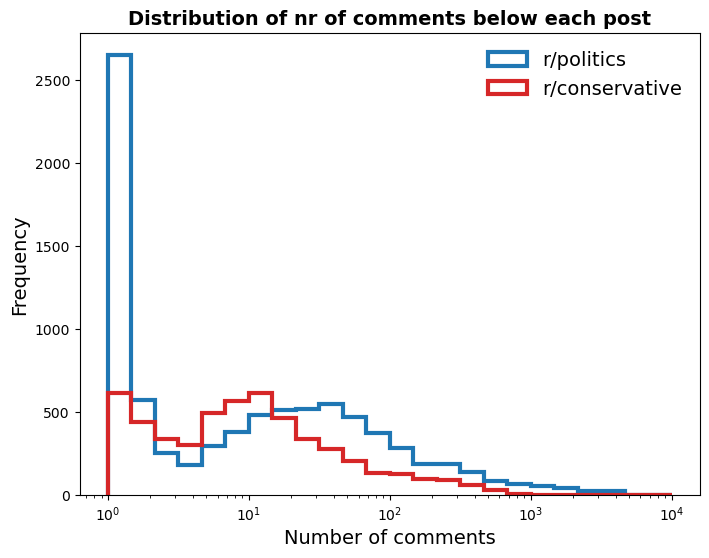

In [19]:
fig, ax = plt.subplots(figsize=(8,6))

logbins = np.logspace(0, 4, 25)
ax.hist(post_df[post_df['subreddit'] == 'politics']['num_comments'], bins=logbins, histtype='step', linewidth=3, label='r/politics', color='tab:blue')
ax.hist(post_df[post_df['subreddit'] == 'conservative']['num_comments'], bins=logbins, histtype='step', linewidth=3, label='r/conservative', color='tab:red')

ax.set_xscale('log')
ax.set_xlabel('Number of comments', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
ax.legend(frameon=False, numpoints=1, fontsize=14)
ax.set_title('Distribution of nr of comments below each post', fontweight='bold', fontsize=14)
fig.savefig('../figures/posts_num_comments.png', dpi=300)
plt.show()

This distribution is bimodal. A lot of posts will only get 1 comment (for r/politics, it might be a subreddit bot that automatically posts below each post - that would explain why that peak is so high). For both subreddits, there is a second peak which is for the posts that do get some engagement. The mode for this second peak is different for both subreddits - at around 10 comments for r/conservative, and around 40 comments for r/politics.

Next - it might be interesting to do some EDA relating to word frequency. 

Sidenote: for the EDA in this notebook I'll use CountVectorizer() just because it makes more intuitive sense when looking a/t word frequency. For the actual modeling I'll use TfidfVectorizer(), which weighs words by how often they appear in other documents across the corpus.

In [20]:
cvec = CountVectorizer(stop_words='english')

X = post_df['title']
cvec.fit(X)
X_cv = cvec.transform(X)
X_cv.shape

(18936, 16967)

In [21]:
words_df = pd.DataFrame(X_cv.todense(), columns = cvec.get_feature_names_out())
words_df = words_df.set_index(post_df.index)

In [22]:
words_df[post_df['subreddit']=='politics']

,00,000,0003,001,01,03,030,035,04,05,...,zoomers,zqeconnq8pq,zte,zuckbucks,zucker,zuckerberg,zwillich,zxumskxdrd,ölü,еxtrеmists
id,,,,,,,,,,,,,,,,,,,,,
xylvpq,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
xylh3y,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
xyla6d,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
xykwzh,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
xykox1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ynk5mr,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ynjoyf,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ynjone,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
pol_mwords = words_df[post_df['subreddit']=='politics'].sum().sort_values(ascending=False)
con_mwords = words_df[post_df['subreddit']=='conservative'].sum().sort_values(ascending=False)

We now have the most frequently occuring words for both subreddit. Let's first make a simple barchart of the most occuring words in each subreddit

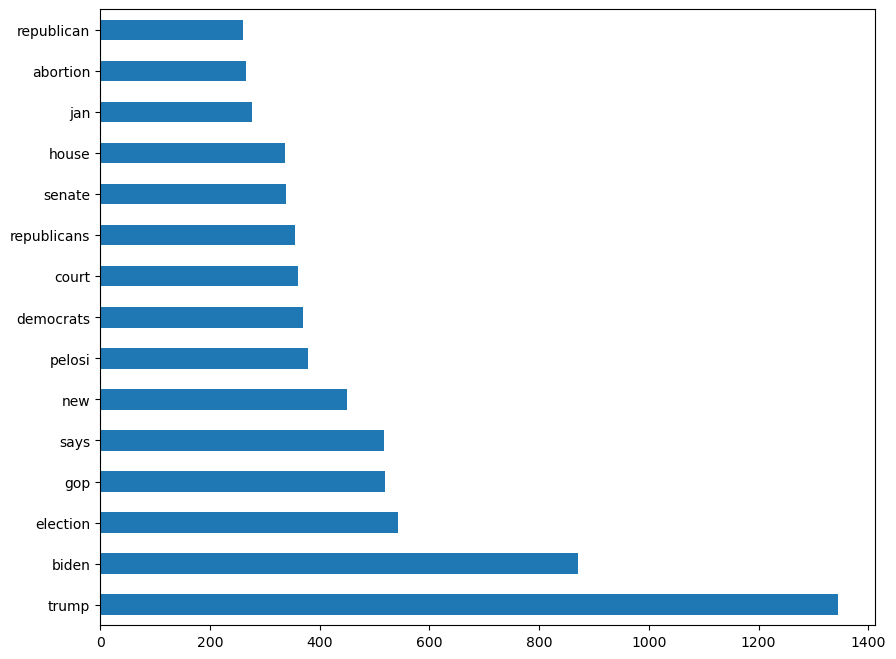

In [24]:
pol_mwords.head(n=15).plot.barh(figsize=(10,8));

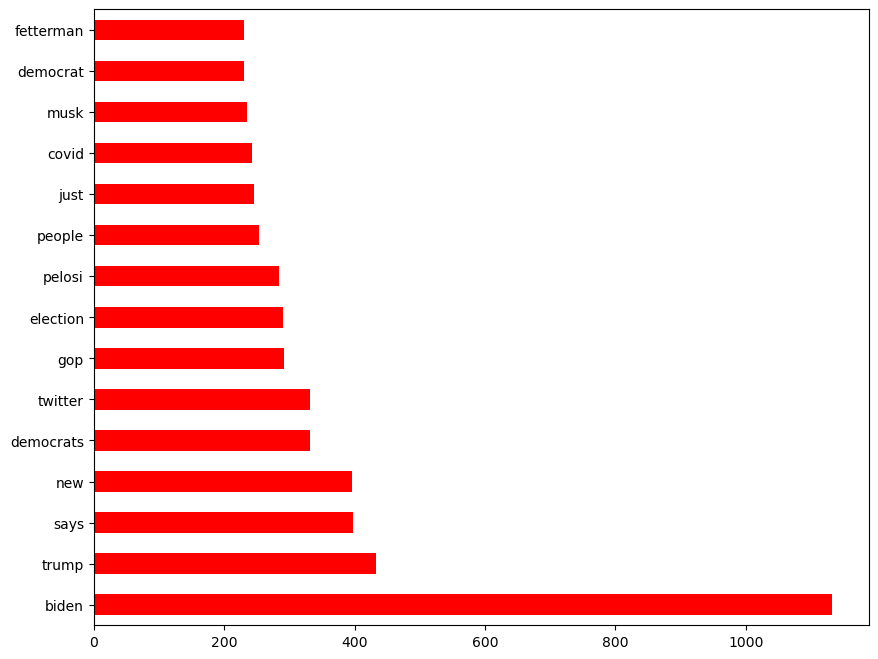

In [25]:
con_mwords.head(n=15).plot.barh(figsize=(10,8), color='red');

'Biden' and 'Trump' were both mentioned the most in both subreddits. But what about words that frequently occur in one subreddit, but not in the other one? Those are the words that might actually help the most to classify which subreddit the data comes from

In [26]:
def calc_uwords(w1,w2, n=15):
    """
    Find out the n most occuring unique words in series w1 and w2 (sorted by occurence)
    Parameters
        w1 and w2 (lists): lists of words
    Returns:
        uw1 (list): list of top n words in w1 that do not occur in the top n words of w2
        uw2 (list): list of top n words in w2 that do not occur in the top n words of w1
    """
    
    uw1, uw2 = [], []
    nuw = []
    i = 0 
    
    #keep going until both lists are n words long
    while (len(uw1) < n) and (len(uw2) < n):
        #Only add word to l1 if its not already in l2
        if (w1[i] not in uw2) and (len(uw1) < n):
            uw1.append(w1[i])
        #If the word is already in l2 and was encountered in l1, retroactively remove it from l2 as well
        elif (w1[i] in uw2):
            uw2.remove(w1[i])
            nuw.append(w1[i])
            
        #Vice versa
        if (w2[i] not in uw1) and (len(uw2) < n):
            uw2.append(w2[i])
        elif (w2[i] in uw1):
            uw1.remove(w2[i])
            nuw.append(w2[i])
        i += 1
    return uw1, uw2

In [27]:
n_unique = 10 #number of unique words we want to investigate
uw1, uw2 = calc_uwords(pol_mwords.index, con_mwords.index, n=n_unique)

Now let's plot both together in a bar chart

In [28]:
words_tot =  pol_mwords[uw1].values.tolist() + con_mwords[uw2].values.tolist()

20 20


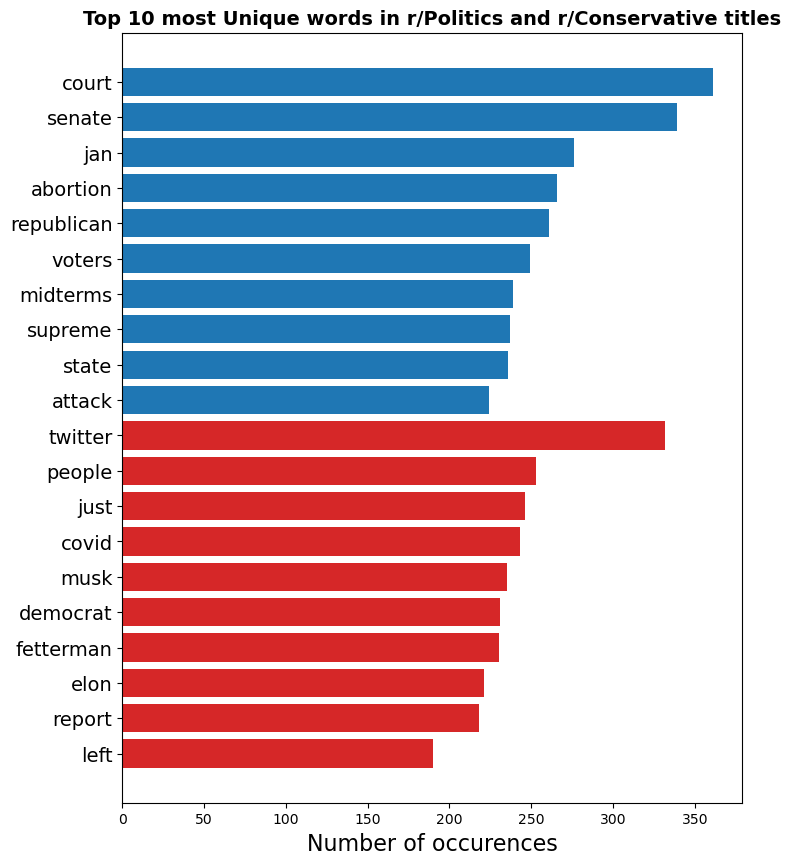

In [29]:
y_tot = np.arange(n_unique*2)
print(len(y_tot), len(words_tot))

fig, ax = plt.subplots(figsize=(8, 10))
clist = ['tab:blue'] * n_unique + ['tab:red'] * n_unique
ax.barh(y_tot, words_tot, color=clist)

        
ax.set_yticks(y_tot)
ax.set_yticklabels(labels=uw1+uw2, fontsize=14)

ax.invert_yaxis() 
#ax.set_xlim(0, 250)
ax.set_xlabel('Number of occurences', fontsize=16)
ax.set_title('Top 10 most Unique words in r/Politics and r/Conservative titles', fontsize=14, fontweight='bold')
fig.savefig('../figures/uwords_titles.png', dpi=300)
plt.show()

### 1.3) Other features

Finally, I'd like to do some feature engineering to the URL column - to extract the domain name that the page links to.
Do all URLs at least contain 'http' or 'www.'? That will make life easier

In [30]:
for i in range(post_df.shape[0]):
    url = post_df['url'][i]
    if type(url) == float:
        continue 
    elif (('http' in url) or ('www.' in url)):
        continue
    else:
        print(i, url)

Alright - so all urls are either a float ('nan'), or have 'http' or 'www.' in the link.
It also appears that some links are simply pictures, mostly hosted on reddit itself. When that's the case, I will simply classify the link as 'Image'.
A second minor issue is that youtube links are sometimes 'youtu.be'. I'll hardcode this to change it to 'youtube'
Now I can write a function to extract the domain name from the URL

In [31]:
def extract_domain(url):
    """
    Extracts the domain name (the part between the www. and the 
    """
    if type(url) == float:
        domain = 'none'
    elif (url[-4:] == '.jpg') or (url[-4:] == '.png'):
        domain = 'image'
    elif 'www.' in url:
        domain = url.split('.')[1]
    elif 'http' in url:
        domain = url.split('://')[1].split('.')[0]
    
    if domain == 'youtu':
        domain = 'youtube'
    return domain

In [32]:
post_df['domain'] = post_df['url'].map(lambda x: extract_domain(x))
post_df['domain'].value_counts()

none               2842
reddit             1184
image               782
youtube             711
foxnews             571
                   ... 
ncpolicywatch         1
creativereview        1
ballotpedia           1
aspenjournalism       1
republicbrief         1
Name: domain, Length: 1596, dtype: int64

Hmm - this series has too many different domains. Could I narrow this down and only use the most frequent ones as categories? Let's say all the domains that have had more than 30 posts on either subreddit

In [33]:
domains = post_df['domain'].value_counts()
print(domains[domains > 30])
print('total amount of posts from most frequent domains:', domains[domains > 30].sum())

none             2842
reddit           1184
image             782
youtube           711
foxnews           571
                 ... 
genesiustimes      34
frontpagemag       33
newsbusters        31
motherjones        31
truthout           31
Name: domain, Length: 83, dtype: int64
total amount of posts from most frequent domains: 14769


These 83 'domains' (including 'other' and 'image') are responsible for more than 75% of all posts, so that might work better

In [34]:
freq_domain_idx = domains[domains > 30].index
post_df['domain'] = post_df['domain'].map(lambda x: x if x in freq_domain_idx else 'other')
post_df['domain'].value_counts()

other            4167
none             2842
reddit           1184
image             782
youtube           711
                 ... 
genesiustimes      34
frontpagemag       33
truthout           31
motherjones        31
newsbusters        31
Name: domain, Length: 84, dtype: int64

Now let's get a sense whether these domains are actually predictive of which subreddit the post might come from.

I found this way of using the unstack method here: https://stackoverflow.com/questions/39132742/groupby-value-counts-on-the-dataframe-pandas

In [35]:
post_df.groupby(by='subreddit')['domain'].value_counts().unstack(fill_value=0).T.head(n=20)

subreddit,conservative,politics
domain,,
abcnews,10,56
amgreatness,85,0
amp,10,30
apnews,26,164
apple,3,37
axios,4,111
babylonbee,99,1
bbc,7,35
bloomberg,13,59


Seems like this could potentially help the classifier a lot! There are quite a few websites that are heavily posted on one subreddit but not the other

Let's save this cleaned dataframe. I'll drop the is_english column again, because we've filtered out all the non-english posts

In [36]:
post_df.drop(columns=['is_english'], inplace=True)
post_df.to_csv('../data/all_submissions_cleaned.csv')

## 2) EDA and cleaning: comments

Now let's repeat some of the same steps for the comments I scraped

In [37]:
com_df = pd.read_csv('../data/all_comments.csv')
com_df.set_index('id', inplace=True)

print(com_df.shape)
com_df.head(n=10)

(61909, 6)


,parent_id,author,created_utc,body,score,subreddit
id,,,,,,
irhr7g7,4.084409e+10,stickznstonez_,1665212396,https://youtu.be/i1oCQ6bZ_Ws\n\nThis guy might...,1,politics
irhr7fd,4.084099e+10,PoliticsModeratorBot,1665212395,Hi `PhilipLiptonSchrute`. [Your comment](/r/po...,1,politics
irhr7bp,NaN,valcatrina,1665212393,I am surprised it takes the FBI to draw this l...,1,politics
irhr79r,4.084347e+10,StrillyBings,1665212392,If he was making calls to Georgia for someone ...,1,politics
irhr79a,NaN,After_Ad_9636,1665212391,Duh?\n\nWhy wouldn’t he?,1,politics
irhr76n,4.084099e+10,PoliticsModeratorBot,1665212389,Hi `PhilipLiptonSchrute`. [Your comment](/r/po...,1,politics
irhr720,4.084420e+10,SweetenedTomatoes,1665212386,"Ah, I remember back in my younger days being h...",1,politics
irhr708,4.084417e+10,Prime157,1665212385,Are you suggesting that a 10 year old raped by...,1,politics
irhr705,NaN,nydwarf,1665212385,Remember Republicans love voting for unqualifi...,1,politics


### 2.1) Cleaning

Even in these 10 rows there are already a few duplicate comments. Maybe I should drop those first. I'll drop comments that were made by the same author, have the same text, on the same subreddit

In [38]:
com_df = com_df.drop_duplicates(subset=['author', 'body', 'subreddit'])
com_df.shape

(48494, 6)

That removed 20% of all comments! A lot of these were probably either removed comments, or bot posts.

Additionally, it also seems there are plenty of comments by 'bots'. A lot of the duplicates I just removed were probably bot posts, but I want to remove the other ones as well. I'm going to assume that if an authors name ends in 'bot', it's a bot. I might miss a few that way, but if I do something less restrictive - eg. say that any author with 'bot' in the name is a bot, I will accidentally filter out real profiles as well, such as names with the word 'both' in them. Let's also add an elif stament for 'AutoModerator', which is a bot that many subreddits use.

In [39]:
com_df['is_bot'] = com_df['author'].map(lambda x: 1 if x.lower()[-3:] == 'bot' else 1 if 'AutoModerator' in x else 0)
com_df[com_df['is_bot']==1].shape

(151, 7)

In [40]:
com_df[com_df['is_bot']==1]['author'].value_counts()

PoliticsModeratorBot    65
AutoModerator           56
FNtaterbot               7
NotObviouslyARobot       6
your_moms_a_bot          5
Not_a_russian_bot        2
junkyard_robot           1
S4drobot                 1
antisocialrobot          1
FavoritesBot             1
Raskalbot                1
ProbablyAnFBIBot         1
USsabot                  1
extendedwarranty_bot     1
NoGoogleAMPBot           1
neutralpoliticsbot       1
Name: author, dtype: int64

I'll get rid of these:

In [41]:
com_df = com_df[com_df['is_bot'] == 0]
com_df.shape

(48343, 7)

What about removed comments? I probably removed most of them when i dropped duplicates

In [42]:
com_df['is_removed'] = com_df['body'].map(lambda x: 1 if '[removed]' in x else 0)
com_df[com_df['is_removed'] == 1]

,parent_id,author,created_utc,body,score,subreddit,is_bot,is_removed
id,,,,,,,,
irhr2cj,4.084337e+10,[deleted],1665212267,[removed],1,politics,0,1
irlvmx0,4.084825e+10,[deleted],1665298736,[removed],1,conservative,0,1


Yup, it seems like there are only two removed comments, 1 in each subreddit. Which makes sense given that I dropped duplicates. Let's drop these final two removed comments

In [43]:
com_df = com_df[com_df['is_removed'] == 0]

Let's also do the same thing as we did for the titles, which is see if there are non-english comments

In [44]:
com_df['is_english'] = com_df['body'].map(lambda x: isEnglish(x)) #this will take a few seconds
not_engl = com_df[com_df['is_english'] == False]
print(not_engl.shape)
not_engl.head(n=10)

(141, 9)


,parent_id,author,created_utc,body,score,subreddit,is_bot,is_removed,is_english
id,,,,,,,,,
irhnuyc,4.084408e+10,Li-renn-pwel,1665209434,NIV is a non-academic dynamic equivalence tran...,1,politics,0,0,False
irqbmzi,4.085845e+10,belfastbiker,1665381418,Why is it even an OPTION¿,1,politics,0,0,False
irv0g4m,4.086540e+10,is_a_molecule,1665470258,"&gt;anyway his answer as to the ""why"" was ""for...",1,politics,0,0,False
iruwhoy,NaN,cdnarclight,1665467127,"this is the prosecution i am watching, which w...",1,politics,0,0,False
iruvak1,4.086643e+10,chicken-nanban,1665466232,You learn to identify certain shapes in this c...,1,politics,0,0,False
irzlwp5,4.086976e+10,CarthageFirePit,1665553478,All Ts must be crossed with a perpendicular st...,1,politics,0,0,False
is4iz6n,4.088269e+10,Solid_College_9145,1665643160,I'd say one of Herschel's most brilliant and t...,1,politics,0,0,False
is9cu8h,4.089070e+10,4thDevilsAdvocate,1665730032,"Looking at Finland, Canada, and Iceland, it se...",1,politics,0,0,False
is9bocm,4.089074e+10,decaf-iced-mocha,1665729130,Why do people willingly put themselves into an...,1,politics,0,0,False


That's not nearly as many comments as I thought. Funny, because I have 3x more comments than titles, but about the same number of non-english rows. 
It seems like a fair amount of these are english as well - it mostly seems to be because of atypical characters.
Let's print a few comments to investigate more

In [45]:
for i in range(20):
    print(not_engl['author'][i], not_engl['body'][i])
    print('-' * 60)

Li-renn-pwel NIV is a non-academic dynamic equivalence translation and here they are taking liberties with the verse. Here is a more exact translation:

 “When he makes her drink the water, if she has defiled herself and committed an act of unfaithfulness toward her husband, the water that brings a curse will then enter into her and become something bitter, and her abdomen will swell, and her thigh will fall away, and the woman will become an object of cursing among her people. “

The punishment is that her belly will swell and her thigh will waste away. Now, thigh is often used as a euphemism for sexual organs in the Bible so NIV was not far off with that. However, “fall away” is not ever used for an abortion or miscarriage. This punishment is more a curse of infertility. I would say that if the woman was pregnant at the time then it might cause a de facto abortion. But again, the woman is never said to be pregnant **and** even if she was, it could be the husband’s baby which they wou

I might want to just keep these posts in, since from what I can tell they mostly seem to be in English.

Just as an additional check, are there any other users with a lot of comments that might be bots?

In [46]:
com_df['author'].value_counts()[:15]

Flowers1966            216
AmosLaRue              184
Cinnadillo             136
GrandpaHardcore        122
Shakes2011             116
ultimis                 85
[deleted]               85
Hefty_Musician2402      84
jumpinjackieflash       79
No_Lunch_7944           78
PB_Mack                 69
2021isjustasbad         69
TheLastDabSauce         66
DidNotRedditMan         65
Calm-Hovercraft9858     63
Name: author, dtype: int64

At least from the names it looks like these might be real people (although on reddit you can never be sure :) )

Another thing I'll want to check is the occurence of subreddit or user information

In [47]:
com_df[com_df['body'].str.contains('u/', na = False)]

,parent_id,author,created_utc,body,score,subreddit,is_bot,is_removed,is_english
id,,,,,,,,,
irqg5mr,NaN,smacksaw,1665385042,"I was just saying this in another thread, but ...",1,politics,0,0,True
irzoswj,4.087459e+10,DanielPhermous,1665555711,What landslide? Over half the US population is...,1,politics,0,0,True
irzolwz,4.087459e+10,DanielPhermous,1665555560,"Whatever you think of the Democrats, they're s...",1,politics,0,0,True
is4fbzf,4.088243e+10,HelluvaKnight,1665640378,Five years. Maximum seven.\n\nhttp://large.sta...,1,politics,0,0,True
is99x4y,4.089030e+10,coogdude,1665727786,“fraud involving aircraft or space vehicle par...,1,politics,0,0,True
isn1e0k,4.091377e+10,bmeisler,1665983093,I wish it was. 2nd worst president of my lifet...,1,politics,0,0,True
iswna1i,4.092958e+10,ZhouDa,1666160703,"&gt;So there's your sources, not that I think ...",1,politics,0,0,True
it1gdmf,4.093799e+10,ChristosFarr,1666247660,http://embryo.soad.umich.edu/carnStages/stage2...,1,politics,0,0,True
itowdb7,NaN,cwwmillwork,1666678061,Clarence Thomas has no integrity. Biden shou...,2,politics,0,0,True


All of these seem to be comments where u/ just happened to appear in a link. I think that maybe users mentioned in comments don't get imported?

In [48]:
display(com_df[com_df['body'].str.contains('r/', na = False)])
print('-' * 50)
display(com_df[com_df['body'].str.contains('R/', na = False)])

,parent_id,author,created_utc,body,score,subreddit,is_bot,is_removed,is_english
id,,,,,,,,,
irhnlop,4.084429e+10,NoJudgementTho,1665209206,Absolute steaming bullshit you haven't heard o...,1,politics,0,0,True
irlvoys,4.085084e+10,HuudaHarkiten,1665298783,/r/stupidopinions,1,politics,0,0,True
irlu4bn,4.084987e+10,Fapoooo,1665297575,Because this is r/democrats,1,politics,0,0,True
irltzag,4.084798e+10,Tiggerhoods,1665297469,I got banned the first time I commented on r/c...,1,politics,0,0,True
irqfozl,4.085808e+10,throwaway-boxer,1665384663,&gt; but the actual philosophy that a libertar...,1,politics,0,0,True
...,...,...,...,...,...,...,...,...,...
itop7gl,NaN,ac19723,1666673068,r/politics is a cesspool of ghouls.,23,conservative,0,0,True
itomhpm,4.097550e+10,novacancy8o8,1666671423,"Is common on the left, go talk about it in r/p...",7,conservative,0,0,True
itodt5f,4.097655e+10,Ryno23-81,1666666871,The Alaskan Republican Party didn’t even want ...,0,conservative,0,0,True


--------------------------------------------------


,parent_id,author,created_utc,body,score,subreddit,is_bot,is_removed,is_english
id,,,,,,,,,
irzm23t,NaN,preetiugly,1665553590,R/leopardsatemyface lol,1,politics,0,0,True
iswna1i,4.092958e+10,ZhouDa,1666160703,"&gt;So there's your sources, not that I think ...",1,politics,0,0,True
itk2can,NaN,Gort_baringa,1666590316,R/politics is wild lol,2,politics,0,0,True
iuq7cci,4.103868e+10,tiny_pickle9001,1667367560,Surprised people seem to have forgotten all of...,1,politics,0,0,True
ivdr3qe,4.107764e+10,jonthecpa,1667798643,R/murderedbywords,1,politics,0,0,True
iu2uodi,NaN,SgtFraggleRock,1666927682,Twitter hasn't made a profit in years.\n\nThey...,12,conservative,0,0,True
iuv1gub,NaN,mittynuke,1667454011,“R/politics has an extreme left wing bias”\n\n...,1,conservative,0,0,True
iuzw4d6,4.105632e+10,andy_b92,1667543364,That’s fair. There are Republicans that are bo...,1,conservative,0,0,True
iv49zbm,4.106249e+10,Automatic-Crew4399,1667622374,Congratulations and welcome to years of\n\n&gt...,1,conservative,0,0,True


Let's do the same as we did for titles, and scrub these just to be safe - they aren't a huge fraction of the data

In [49]:
r1_idx = com_df[com_df['body'].str.contains('r/', na = False)].index
com_df.drop(index=r1_idx, inplace=True)

r2_idx = com_df[com_df['body'].str.contains('R/', na = False)].index
com_df.drop(index=r2_idx, inplace=True)

com_df.shape

(47972, 9)

### 2.2) Language EDA

Let's look at the word length of each comment, and see if there is a difference between subreddits

In [50]:
com_df['word_length'] = com_df['body'].map(lambda x: len(x.split(' ')))
com_df[['subreddit', 'word_length']].groupby(by='subreddit').describe()

word_length                                                    
                   count       mean        std  min  25%   50%   75%     max
subreddit                                                                   
conservative     22097.0  25.412499  34.913345  1.0  8.0  15.0  30.0   938.0
politics         25875.0  32.104850  47.725797  1.0  9.0  18.0  37.0  1608.0

It seems like comments on r/politics are slightly longer. That might end up being useful!

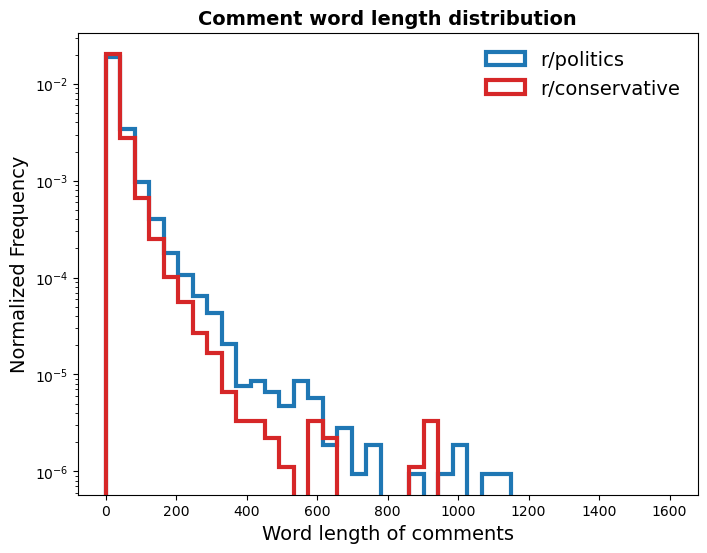

In [51]:
fig, ax = plt.subplots(figsize=(8,6))

wlen_bins = np.linspace(1, 1600, 40)
ax.hist(com_df[com_df['subreddit'] == 'politics']['word_length'], bins=wlen_bins, histtype='step', linewidth=3, label='r/politics', density=True, color='tab:blue')
ax.hist(com_df[com_df['subreddit'] == 'conservative']['word_length'], bins=wlen_bins, histtype='step', linewidth=3, label='r/conservative', density=True, color='tab:red')

ax.legend(frameon=False, numpoints=1, fontsize=14)
ax.set_yscale('log')
ax.set_xlabel('Word length of comments', fontsize=14)
ax.set_ylabel('Normalized Frequency', fontsize=14)
ax.set_title('Comment word length distribution', fontsize=14, fontweight='bold')
plt.show()

It seems like this might help telling the two subreddits apart - comments on r/politics are typically longer.
Note the log-scale though - the majority of comments are short, and for those comments it is about equally likely to be from either subreddit. For longer comments though, the probability that the comment is from r/politics rather than r/conservative increases.

Another thing to consider is how many comments are short. If a comment is only one or two words long, my model will have very little information to classify with, and thus have a difficult time with the classification.

In [52]:
def make_words_cl(nr_words):
    cl_words = np.zeros(nr_words.shape)
    tot_words = nr_words.sum()
    for i, word_freq in enumerate(nr_words):
        cl_words[i] = nr_words[:i].sum()/tot_words
    return cl_words
        

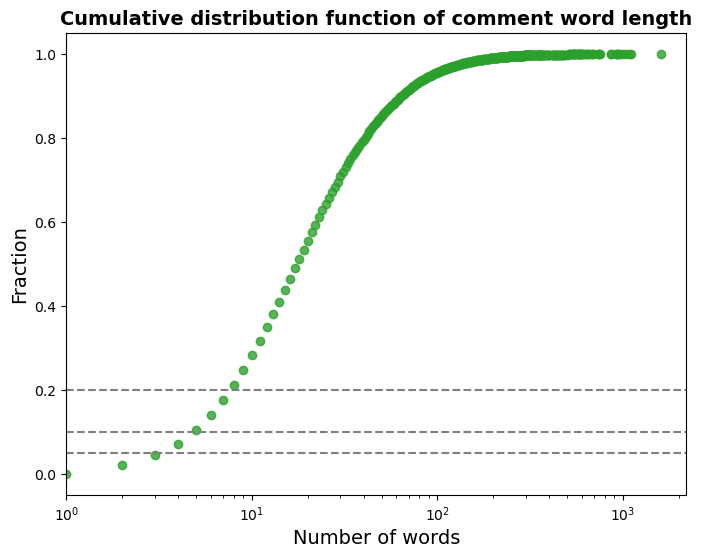

In [53]:
nr_words = com_df['word_length'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(8,6))

cl_words = make_words_cl(nr_words)

ax.scatter(nr_words.index, cl_words, marker='o', alpha=0.8, color='tab:green')
ax.set_title('Cumulative distribution function of comment word length', fontweight='bold', fontsize=14)
ax.set_xlim(1, 2200)
ax.set_xscale('log')
ax.axhline(0.05, linestyle='dashed', color='grey')
ax.axhline(0.1, linestyle='dashed', color='grey')
ax.axhline(0.2, linestyle='dashed', color='grey')

ax.set_xlabel('Number of words', fontsize=14)
ax.set_ylabel('Fraction', fontsize=14)
plt.show()

I'm not going to filter any comments out on word length as it is, but this may be useful information to keep in mind for later down the line. About 5%/10%/20% of comments are shorter than 3/5/8 words, respectively.

Let's run  CountVectorizer() on the comments to look at some of the most frequently occuring words

In [54]:
cvec = CountVectorizer(stop_words='english')
X = com_df['body']
cvec.fit(X)
X_cv = cvec.transform(X)
X_cv.shape

(47972, 36341)

In [55]:
cwords_df = pd.DataFrame(X_cv.todense(), columns = cvec.get_feature_names_out())
cwords_df = cwords_df.set_index(com_df.index)

In [56]:
pol_cwords = cwords_df[com_df['subreddit']=='politics'].sum().sort_values(ascending=False)
con_cwords = cwords_df[com_df['subreddit']=='conservative'].sum().sort_values(ascending=False)

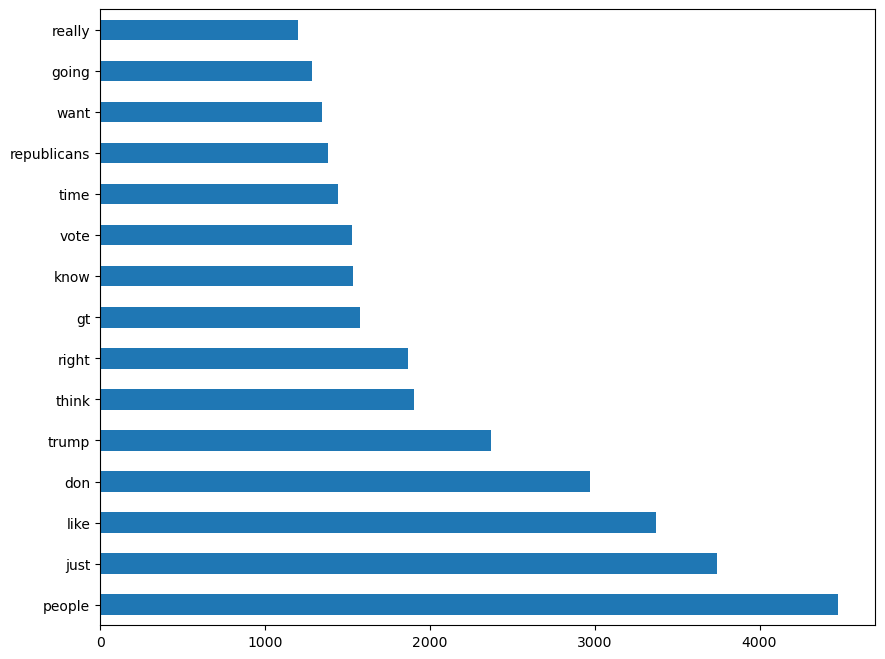

In [57]:
pol_cwords.head(n=15).plot.barh(figsize=(10,8));

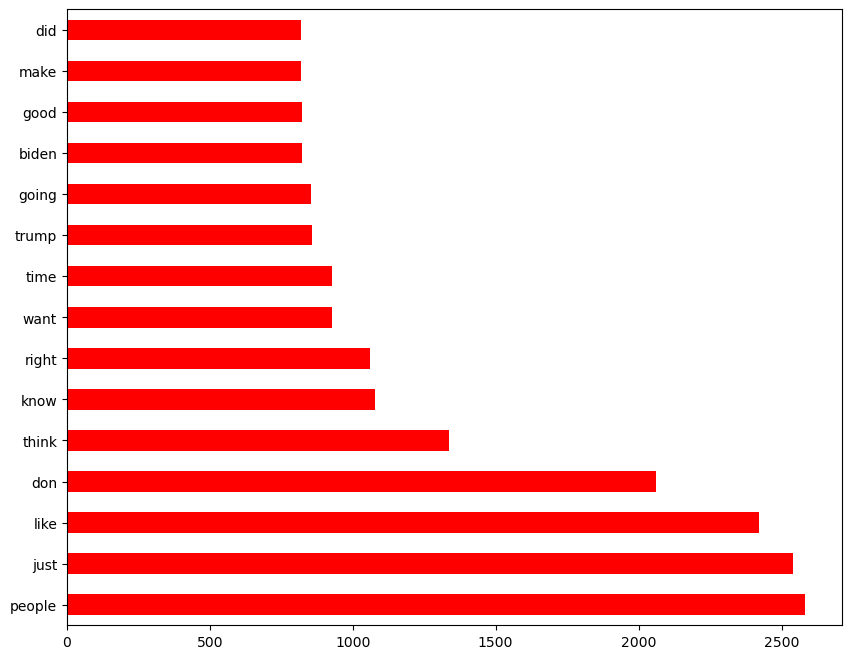

In [58]:
con_cwords.head(n=15).plot.barh(figsize=(10,8), color='red');

What about unique words (Using the same function I wrote earlier for titles)

In [59]:
n_unique = 10 #number of unique words we want to investigate
uw1, uw2 = calc_uwords(pol_cwords.index, con_cwords.index, n=n_unique)

20 20


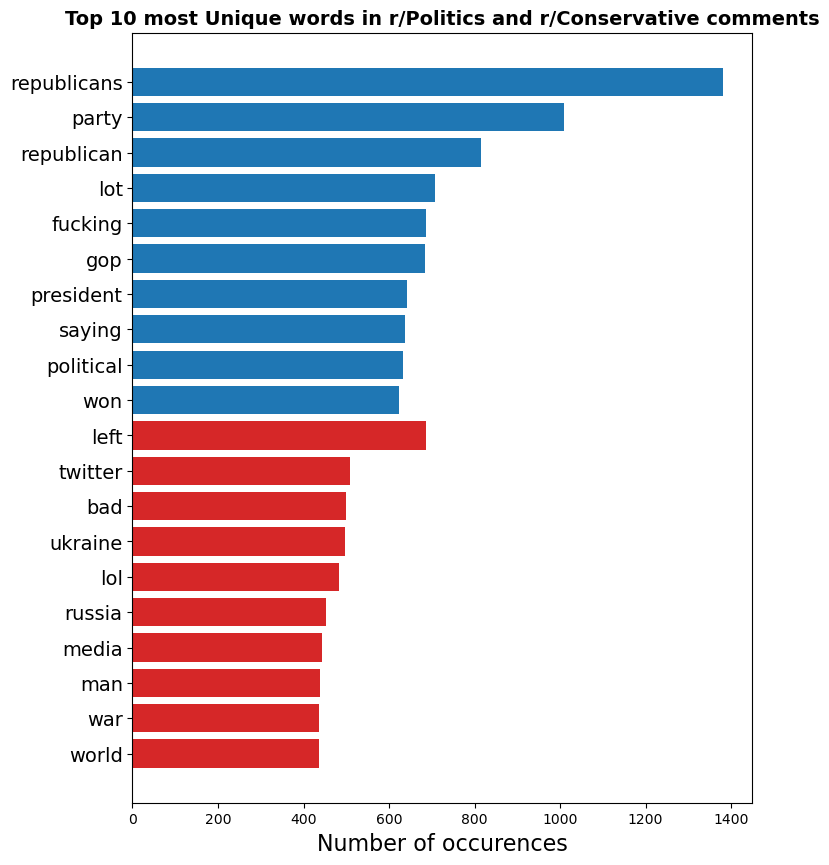

In [60]:
words_tot =  pol_cwords[uw1].values.tolist() + con_cwords[uw2].values.tolist()

y_tot = np.arange(n_unique*2)
print(len(y_tot), len(words_tot))

fig, ax = plt.subplots(figsize=(8, 10))
clist = ['tab:blue'] * n_unique + ['tab:red'] * n_unique
ax.barh(y_tot, words_tot, color=clist)

        
ax.set_yticks(y_tot)
ax.set_yticklabels(labels=uw1+uw2, fontsize=14)

ax.invert_yaxis() 
#ax.set_xlim(0, 250)
ax.set_xlabel('Number of occurences', fontsize=16)
ax.set_title('Top 10 most Unique words in r/Politics and r/Conservative comments', fontsize=14, fontweight='bold')
plt.show()

Next, I want to see how many words make up how much % of the total corpus. I will make a cumulative distribution function similar to the word length one

In [61]:
def make_corpus_cl(summed_words):
    cl_words = np.zeros(summed_words.shape)
    tot_words = summed_words.sum()
    for i in range(len(summed_words)):
        cl_words[i] = summed_words[:i].sum()/tot_words
    return cl_words

In [62]:
summed_words = cwords_df.sum().sort_values(ascending=False)

summed_words[:5]

people    7059
just      6283
like      5792
don       5033
think     3243
dtype: int64

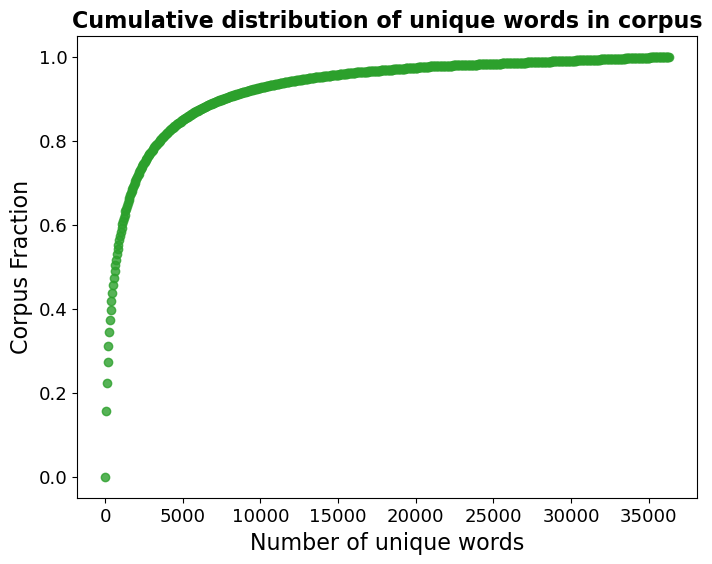

0.98 of the corpus is contained in the 23000 most frequent unique words


In [63]:
fig, ax = plt.subplots(figsize=(8,6))

cl_corpus = make_corpus_cl(summed_words)

wnr = np.arange(len(summed_words))
ax.scatter(wnr[::50], cl_corpus[::50], marker='o', alpha=0.8, color='tab:green')
ax.set_title('Cumulative distribution of unique words in corpus', fontweight='bold', fontsize=16)
ax.set_xlabel('Number of unique words', fontsize=16)
ax.set_ylabel('Corpus Fraction', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=13)
fig.savefig('../figures/mono_cum_wl.png', dpi=300)
plt.show()

print(f'{round(cl_corpus[23000],2)} of the corpus is contained in the 23000 most frequent unique words')

So the 23000 most common unique words make up about 98% of the total of words in the corpus. This could be useful information to limit the number of features in the model. I could get rid of about 1/3rd of all unique words, and would only lose a little bit of information.

What if I were to include bigrams?
The sparse matrix actually gets too large to convert to a dataframe - so I'll limit myself to only using the first 10,000 rows

In [64]:
cvec = CountVectorizer(stop_words='english', ngram_range=(1,2))
X = com_df['body'][:10000]
cvec.fit(X)
X_bi = cvec.transform(X)
X_bi.shape

c_bi_df = pd.DataFrame(X_bi.todense(), columns = cvec.get_feature_names_out())
c_bi_df = c_bi_df.set_index(com_df[:10000].index)

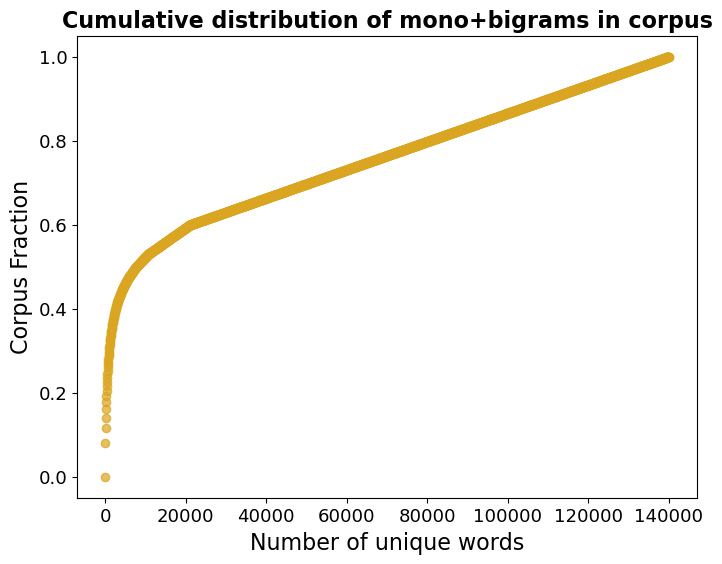

In [65]:
summed_words = c_bi_df.sum().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(8,6))

cl_corpus = make_corpus_cl(summed_words)

wnr = np.arange(len(summed_words))
ax.scatter(wnr[::50], cl_corpus[::50], marker='o', alpha=0.7, color='goldenrod')
ax.set_title('Cumulative distribution of mono+bigrams in corpus', fontweight='bold', fontsize=16)
ax.set_xlabel('Number of unique words', fontsize=16)
ax.set_ylabel('Corpus Fraction', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=13)

fig.savefig('../figures/bigram_cum_wl.png', dpi=300)
plt.show()


This shows some important things about the usage of bigrams. First of all, it really explodes the number of unique features (note that I only used the first 10,000 rows here!). Secondly, the bigrams are much more evenly spread in frequency throughout the corpus.

My sense is that using some frequent bigrams might help the model, but I'll need to cut down on the number of features aggressively if I want to use them - otherwise I will end up with way too many.

As an experiment, let's say that I want to use 1/7th of the total number of unique features. How many features would there be for the full 48k rows?

In [66]:
cvec = CountVectorizer(stop_words='english', ngram_range=(1,2))
X = com_df['body']
cvec.fit(X)
X_bi = cvec.transform(X)
print(X_bi.shape)
print(X_bi.shape[1]/7)
full_fnames = cvec.get_feature_names_out()

(47972, 493542)
70506.0


Let's round this up to 71000 features and set this as the max_features param

In [67]:
cvec_lim = CountVectorizer(stop_words='english', ngram_range=(1,2), max_features=71000)
X = com_df['body']
cvec_lim.fit(X)
X_bi_lim = cvec_lim.transform(X)
lim_fnames = cvec_lim.get_feature_names_out()

What would be the proportion of monograms and bigrams in this feature-limited tranformation?

In [68]:
nr_mono = sum([1 for fname in lim_fnames if len(fname.split(' ')) ==1])
nr_bi =  sum([1 for fname in lim_fnames if len(fname.split(' ')) ==2])
print(f'Number of monograms {nr_mono}')
print(f'Number of bigrams {nr_bi}')

Number of monograms 19642
Number of bigrams 51358


So it appears that if I just run max_features, the majority of my features will still be bigrams. I wonder if there's a way that I can do some custom postprocessing, such that I can reduce the number of bigrams even more without also reducing the number of monograms. I'll explore this more in the modeling notebook. 

### 2.3) Other Features

In the data collection notebook, I included a 'score' metric for the comments data.

In [69]:
com_df[['subreddit', 'score']].groupby(by='subreddit').describe()

score                                                   
                count      mean        std    min  25%  50%  75%     max
subreddit                                                               
conservative  22097.0  4.003394  19.943113 -321.0  1.0  1.0  1.0   775.0
politics      25875.0  4.415691  63.036833 -223.0  1.0  1.0  1.0  5759.0

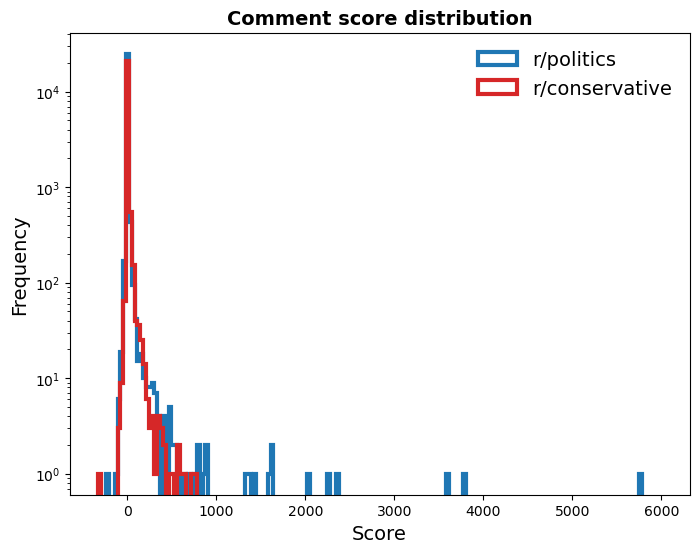

In [70]:
fig, ax = plt.subplots(figsize=(8,6))

score_bins = np.linspace(-330, 6000, 200)
ax.hist(com_df[com_df['subreddit'] == 'politics']['score'], bins=score_bins, histtype='step', linewidth=3, color='tab:blue', label='r/politics')
ax.hist(com_df[com_df['subreddit'] == 'conservative']['score'], bins=score_bins, histtype='step', linewidth=3, color='tab:red', label='r/conservative')

ax.set_yscale('log')
ax.set_xlabel('Score', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
ax.legend(frameon=False, numpoints=1, fontsize=14)
ax.set_title('Comment score distribution', fontsize=14, fontweight='bold')
plt.show()

It looks like r/politics comments have slightly more upvotes. But it seems like for both subreddits the majority of comments only have a single upvote. So I'm not completely sure how helpful this will be.

A final thing I might want to check - how many posts are made by frequent posters? r/Conservative has restrictions in who they allow in the comments section. It might be that the average commenter on that subreddit posts more - while r/politics is open to everyone, and so there will be more commenters who might comment less frequently.

I'll define 'frequent poster' as anyone that made more than 15 posts over the range of my data (1 month, so 1 comment per 2 days)

In [71]:
author_counts = com_df['author'].value_counts()
author_counts[author_counts > 15].sum()

7506

Is this fraction different for the two subreddits?

In [72]:
au_counts_con = com_df[com_df['subreddit'] == 'conservative']['author'].value_counts().drop('[deleted]')
au_counts_pol = com_df[com_df['subreddit'] == 'politics']['author'].value_counts().drop('[deleted]')

In [73]:
print(f'Posts by frequent posters in r/politics: {au_counts_pol[au_counts_pol > 15].sum()}')
print(f'Posts by frequent posters in r/conservative: {au_counts_con[au_counts_con > 15].sum()}')

Posts by frequent posters in r/politics: 2304
Posts by frequent posters in r/conservative: 4993


This might help move the needle a little bit. If the comment is by a frequent commenter, the comment is more likely to come from r/conservative. Let's make a new column for this.

In [74]:
freq_idx_pol = au_counts_pol[au_counts_pol > 15].index
freq_idx_con = au_counts_con[au_counts_con > 15].index
all_idx = freq_idx_pol.union(freq_idx_con)
com_df['freq_poster'] = com_df['author'].map(lambda x: 1 if x in all_idx else 0)

Now let's save my cleaned comments dataframe to use for modeling. Let's get rid of some of the columns I created that I won't need for the modeling: is_english , is_bot and is_removed

In [75]:
com_df.drop(columns=['is_english', 'is_bot', 'is_removed'], inplace=True)
com_df.to_csv('../data/all_comments_cleaned.csv')